In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [2]:
url = 'https://raw.githubusercontent.com/justmarkham/DAT8/master/data/chipotle.tsv'

In [7]:
df = pd.read_csv(url, sep = '\t')

In [9]:
df.head(5)

,order_id,quantity,item_name,choice_description,item_price
0,1,1,Chips and Fresh Tomato Salsa,NaN,$2.39
1,1,1,Izze,[Clementine],$3.39
2,1,1,Nantucket Nectar,[Apple],$3.39
3,1,1,Chips and Tomatillo-Green Chili Salsa,NaN,$2.39
4,2,2,Chicken Bowl,"[Tomatillo-Red Chili Salsa (Hot), [Black Beans...",$16.98


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4622 entries, 0 to 4621
Data columns (total 5 columns):
order_id              4622 non-null int64
quantity              4622 non-null int64
item_name             4622 non-null object
choice_description    3376 non-null object
item_price            4622 non-null object
dtypes: int64(2), object(3)
memory usage: 180.6+ KB


In [11]:
df.columns

Index(['order_id', 'quantity', 'item_name', 'choice_description',
       'item_price'],
      dtype='object')

In [19]:
c = df.groupby('item_name').sum()

In [20]:
c = c.sort_values(['quantity'], ascending=False)

In [22]:
c.head(1)

,order_id,quantity
item_name,,
Chicken Bowl,713926,761


In [23]:
d=  df.groupby('choice_description').sum()
d = d.sort_values(['quantity'], ascending = False)
d.head(5)

,order_id,quantity
choice_description,,
[Diet Coke],123455,159
[Coke],122752,143
[Sprite],80426,89
"[Fresh Tomato Salsa, [Rice, Black Beans, Cheese, Sour Cream, Lettuce]]",43088,49
"[Fresh Tomato Salsa, [Rice, Black Beans, Cheese, Sour Cream]]",36041,42


## Turn an iterm into float.

In [25]:
dollar = lambda x: float(x[1:-1])
df.item_price = df.item_price.apply(dollar)

In [26]:
revenue = (df.quantity*df.item_price).sum()

In [27]:
print("Revenue was: $" + str(np.round(revenue, 2)))

Revenue was: $39237.02


In [30]:
filtered = df.drop_duplicates(['quantity', 'item_name'])

In [34]:
one_prod = filtered[filtered.quantity == 1]

In [36]:
price_per_item = one_prod[['item_name', 'item_price']]

In [37]:
price_per_item.sort_values(by = 'item_price',ascending=False)

,item_name,item_price
606,Steak Salad Bowl,11.89
1229,Barbacoa Salad Bowl,11.89
1132,Carnitas Salad Bowl,11.89
7,Steak Burrito,11.75
168,Barbacoa Crispy Tacos,11.75
39,Barbacoa Bowl,11.75
738,Veggie Soft Tacos,11.25
186,Veggie Salad Bowl,11.25
62,Veggie Bowl,11.25
57,Veggie Burrito,11.25


In [38]:
df.sort_values(by = 'item_price', ascending = False).head(2)

,order_id,quantity,item_name,choice_description,item_price
3598,1443,15,Chips and Fresh Tomato Salsa,NaN,44.25
3480,1398,3,Carnitas Bowl,"[Roasted Chili Corn Salsa, [Fajita Vegetables,...",35.25


In [39]:
df[df.item_name == 'Veggie Salad Bowl']

,order_id,quantity,item_name,choice_description,item_price
186,83,1,Veggie Salad Bowl,"[Fresh Tomato Salsa, [Fajita Vegetables, Rice,...",11.25
295,128,1,Veggie Salad Bowl,"[Fresh Tomato Salsa, [Fajita Vegetables, Lettu...",11.25
455,195,1,Veggie Salad Bowl,"[Fresh Tomato Salsa, [Fajita Vegetables, Rice,...",11.25
496,207,1,Veggie Salad Bowl,"[Fresh Tomato Salsa, [Rice, Lettuce, Guacamole...",11.25
960,394,1,Veggie Salad Bowl,"[Fresh Tomato Salsa, [Fajita Vegetables, Lettu...",8.75
1316,536,1,Veggie Salad Bowl,"[Fresh Tomato Salsa, [Fajita Vegetables, Rice,...",8.75
1884,760,1,Veggie Salad Bowl,"[Fresh Tomato Salsa, [Fajita Vegetables, Rice,...",11.25
2156,869,1,Veggie Salad Bowl,"[Tomatillo Red Chili Salsa, [Fajita Vegetables...",11.25
2223,896,1,Veggie Salad Bowl,"[Roasted Chili Corn Salsa, Fajita Vegetables]",8.75
2269,913,1,Veggie Salad Bowl,"[Fresh Tomato Salsa, [Fajita Vegetables, Rice,...",8.75


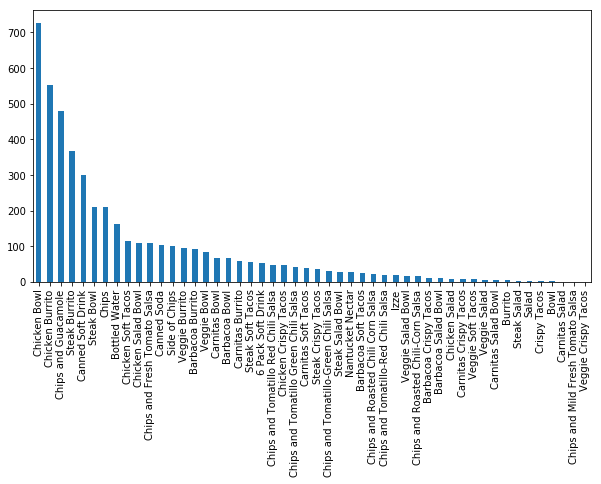

In [56]:
df['item_name'].value_counts().plot(kind = 'bar', figsize=(10,5))

In [57]:
f = df['item_name'].value_counts()

In [60]:
f.sort_values(ascending = False).head(1)

Chicken Bowl    726
Name: item_name, dtype: int64